## All wordcloud backend Code

In [43]:
import jieba
import pandas as pd
import collections

teams_text_data = pd.read_csv("whole_text_upper.csv")
defined_words_dict = pd.read_csv("defined_words.csv",encoding = 'utf_8_sig')

# INPUT: list of keywords
input_keywords = ['KPL']
# translate keywords in the dictionary
translated_keywords = []
for word in input_keywords:
    if word in list(defined_words_dict['english']):
        index = defined_words_dict.index[defined_words_dict['english'] == 'Team Wolf'].tolist()[0]
        word = defined_words_dict['chinese'][index]
    translated_keywords.append(word)

# select the related texts
select_texts = []
for text in teams_text_data['text']:
    for keyword in translated_keywords:
        if keyword in text:
            select_texts.append(text)
            break

team_name_list = {
    'ttg','TTG',
    'edg','EDG',
    'estarpro',
    '狼队','重庆狼队','重庆',
    'rng','RNG',
    'vg','VG',
    'tes','TES',
    'lgd','大鹅','LGD',
    'drg','DRG',
    'hero','久竞','Hero','HERO',
    'dyg','DYG',
    'wb','WB',
    'we','西安','We','WE',
    'ag','AG',
    'ksg','KSG',
    'rw','RW',
    'tes','长沙TES','长沙',
    'estar','eStar','eStar Pro','Pro','ESTAR','EStar','Estar','ESTARPRO','ESTAR.PRO',
    '长沙TES A','长沙TES A ','TES.A'
    'AG','ag',
    'XYG','xyg',
    'GK','fk',
    'QGhappy','qg','happy','qghappy','Qghappy',
    'YTG','ytg',
    'XQ','xq',
    'MTG','mtg',
    'BA','ba','BA 黑','黑凤梨',
    'TS',
    'EMC','ESC',
    'TLG','MD',
    '火豹',
    'VTG','QGH'
}
self_stop_words = {
    '长沙TES A','长沙TES A ','KPL','kpl','斗鱼','虎牙','哔哩哔哩','直播','广州','重庆','厦门','苏州','清清的','张大','不错','一回','一轮',
    '成都','武汉','济南','杭州','召唤师','佛山','深圳','比赛','拿下','常规赛','选手','上海','北京','西安','长沙','分','本场','Pro','南京',
    '胜利','队伍','今日','本局','超玩会','PY','A','王者 荣耀','月 日 ','最终','中','精彩','月','说','王者','赛季','赛','秋季','季后赛','表现','战队','本赛季',
    '活动','粉丝','荣耀','本次','春季','对决','奖励','分钟','M','年','秒','电 竞','面对','赛事','英雄','游戏','俱乐部','电竞','日',' 电 竞','竞','职业','小编',
    '一场','对手','赛场','冬季','结束','世界','电','夏季','分半','组','蒙','小伙伴','评论','这场','交手','确实','真的','选用','现场','侠','杀','T','S','b','支','海报',
    'KRKPL','第一轮','第二轮','第三轮','TOPM','前','新','更是','全国大赛','波','高','强','均','打出','拿出','第一','时','效果','出','点击','实力','将会','解说',
    '第一局','第二局','第三局','第二场','情况','请','两队','上场','营地','获奖','00','腾讯','15','10','20','12','17','18','2019','讨论','11','官方','直播间','参与','观看',
    '区','位','B','死','破','鱼','掉','一战','局','太','一局','进场','未能','主教练','两个','来到','决赛','大招','两人','之外','这是','算是','网友','提前',
    '击杀','总决赛','技能','对阵','敌方','更','看点','冠军','拿到','赛区','冠军杯','两支','战胜','时间','这支','积分','肯定','亚军','击败','正式','希望',
    '机会','无缘','开赛','原因','第二周','回事','2022KPL','留言','往下','不好','参加','两场','轻松','开启','想要','只能','大仙','输给','终于','连败','依旧','开打','玩家','总冠军','职业联赛','迎来','事情','资格','联赛','名额','最佳','选拔赛','晋级','期待','成功','带来','阵容','胜','负','上演','成绩','关键','胜者','败者','首发','名单','这只','带走','二连','挂牌','席位','观众','一支'
}
suggest_words = {
    '露娜','娜可露露','公孙离','镜','澜','清清',
    '野区','对位','对抗路','发育路',
    '先知主宰','主宰先锋','暗影暴君','风暴龙王','红buff','蓝buff','红Buff','蓝Buff','暗影先锋',
    '高地防御塔','金币怪','大龙','小龙','KDA','kda',
    'ADC','AP','AD','肉','TANK','Tank','刺客','半肉','战士','输出位','兵线',
    '补刀','GANK','gank','Gank','抓人','对线','Buff','Debuff','dbuff','buff','大招','奶','打野',
    '泉水','野区','高地','带线','团战','偷塔',
}
# add defined team names to jieba
for wd in team_name_list: 
    jieba.add_word(wd)
    jieba.suggest_freq(wd)
# add other defined words to jieba
for wd in suggest_words: 
    jieba.add_word(wd)
    jieba.suggest_freq(wd)
for wd in defined_words_dict['chinese']:
    jieba.add_word(wd)
    jieba.suggest_freq(wd)
# the words should be removed
stop_words = self_stop_words
# remove the input
stop_words.update(input_keywords)
# remove team names (other consideration: remove team names when input is team name)
stop_words.update(team_name_list)
# update the standard chinese & english stop words
content = [line.strip() for line in open('A_whole_stopwords.txt','r', encoding='utf-8', errors='ignore').readlines()]
stop_words.update(content)

# join select_texts, jieba lcut: cut to words and convert to list
all_words = ''.join(select_texts)
all_words = jieba.lcut(all_words,use_paddle=True)

# count the most common words
count = collections.Counter()
for x in all_words:
    #  not number; not in the stopwords; 
    if (x not in stop_words) and (not x.isdigit()) and(len(x)>1 or x in suggest_words):
        count[x] += 1
# take the 60 most common words
count = count.most_common()[0:60]
output_df = pd.DataFrame (count, columns = ['text','count'])
for wd in output_df['text']:
    if wd in list(defined_words_dict['chinese']):
        # replace the chinese with the english in the defined dictionary
        output_df['text'] = output_df['text'].replace([wd], defined_words_dict[defined_words_dict['chinese'].isin([wd])]['english'])
# save to the output csv
output_df.to_csv('words_frequency.csv')
output_df.to_json(orient="records",path_or_buf = 'words_frequency.json')

### map frequency to the frontend font size
linear, max & min size

In [44]:
output_df_size = output_df.rename(columns={"text": "text", "count": "size"})
max_count = int(output_df['count'].iat[0])
max_font = 20
min_font = 5
# if (x_count/max_count)*max_font (relavtive font size) > min font size, return relative size, else return minimum size
output_df_size["size"] = output_df_size["size"].apply(lambda x: int(x*max_font/max_count) if int(x*max_font/max_count)>=min_font else min_font)
output_df_size.to_json(orient="records",path_or_buf = 'words_size.json')
output_df_size

,text,size
0,club transfer,30
1,JiuZhe (C),28
2,league,27
3,temporal,26
4,coach,24
5,home,19
6,state (TE),17
7,sweep,17
8,WorldCup,15
9,AP (TE),14


## show frequencies

In [45]:
output_df

,text,count
0,club transfer,166
1,JiuZhe (C),155
2,league,151
3,temporal,144
4,coach,134
5,home,106
6,state (TE),98
7,sweep,95
8,WorldCup,88
9,AP (TE),78


## Demo word cloud
60 words

(-0.5, 2399.5, 1799.5, -0.5)

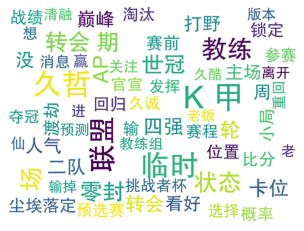

In [46]:
import wordcloud
import matplotlib
FONTPATH = 'fangzhengheiti.ttf'
test = all_words = ' '.join(all_words)
cloud = wordcloud.WordCloud(background_color = 'white', 
    font_path = FONTPATH, 
    max_words = 60, 
    width = 2400,
    height = 1800,
    max_font_size = 260,
    random_state = 30,
    stopwords = stop_words).generate(test)
# random_state: how many types of color state
matplotlib.pyplot.imshow(cloud)
matplotlib.pyplot.axis("off")
# save if needed
# cloud.to_file('cloud.png')